In [1]:

import random

import chess
import matplotlib.pyplot as plt
from Agent import Agent
from AgentCollection import AgentCollection
from ChessEnvironment import ChessEnvironment
from Experiment import Experiment
from plotting import plot_errors, plot_errors_scatter, plot_histograms, plot_metrics, transform_dataset, plot_errors_grouped, plot_errors_individually
from SampleConverter import SampleConverter
from stockfish import Stockfish #add to python env variables

import matplotlib.pyplot as plt
from constants import EPISODES_COOP, HIDDEN_SIZE, MAX_STEPS, PATH

from main import train_net

FILE ="03_sorted_100000.txt" 


agentCollection = AgentCollection()        
agentCollection.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agentCollection.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agentCollection.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agentCollection.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agentCollection.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agentCollection.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agentCollection.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agentCollection.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agentCollection.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agentCollection.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agentCollection.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agentCollection.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agentCollection.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agentCollection.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agentCollection.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agentCollection.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agentCollection.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agentCollection.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agentCollection) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agentCollection.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agentCollection.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agentCollection.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agentCollection, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agentCollection.getAgentsByColor(Tru

--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 


True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f68f660c10 (Kd2)>
Round  0  completed
True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f68e9dc190 (Kd1)>
Round  1  completed
True 7 [] total options: 22 options  <LegalMoveGenerator at 0x1f68cb84e50 (Rh4, Rh3, Rh2, Rg1, Bh3, Bg2, Qxd4, Qd3, Qd2, Bxh6, Bg5, Bf4, Be3, Ba3, Bd2, Bb2, Rb2, Ra1, f3, e3, f4, e4)>
Round  2  completed


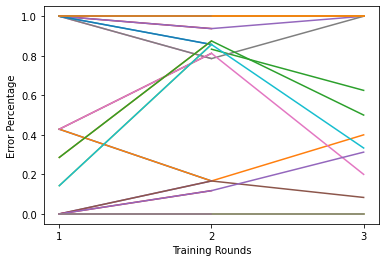

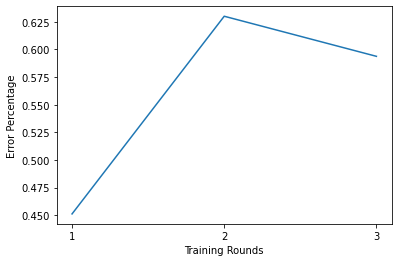

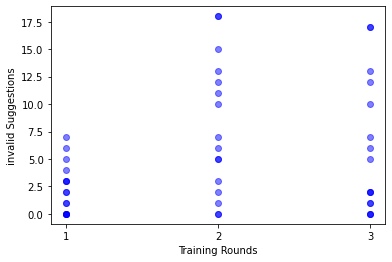

In [2]:
ROUNDS = 3
EPISODES_CNN = 3

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("Round ", str(i), " completed")

plot_errors_individually(white_agents)
plot_errors_grouped(white_agents)
plot_errors_scatter(white_agents)
#for agent in white_agents: 
#    plot_histograms(agent)

--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 2 [] total options: 5 options  <LegalMoveGenerator at 0x1f69a9ff940 (Kxe3, Kc3, Ke1, Kd1, fxe3)>
Round  0  completed
True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f69bebef10 (Ke1)>
Round  1  completed
True 3 [] total options: 4 options  <LegalMoveGenerator at 0x1f69c77b640 (Bd2, Qd2, Nc3, Nd2)>
Round  2  completed
True 4 [] total options: 6 options  <LegalMoveGenerator at 0x1f69979f6a0 (Ke2, Kc2, Ke1, Rd2, Bd3, Nd2)>
Round  3  completed
True 2 [] total options: 2 options  <LegalMoveGenerator at 0x1f69bedc790 (Kf1, Nxd2)>
Round  4  completed
True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f69bfb5640 (Rg3)>
Round  5  completed
True 10 [] total options: 29 options  <LegalMoveGenerator at 0x1f69d9c9100 (Bxc7, Bxh6, Bd6, Bg5, Be5, Bg3, Be3, Bd2, Bc1, Ng5, Nf2, Ng1, Rg1, B

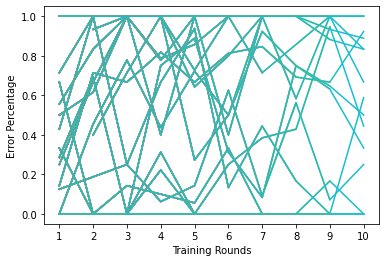

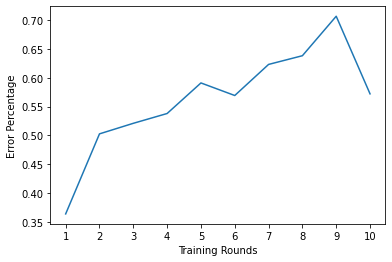

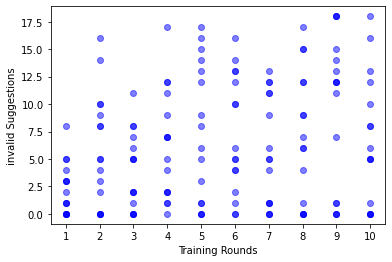

In [3]:

agent_10 = AgentCollection()        
agent_10.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_10.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_10.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_10.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_10.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_10.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_10.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_10.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_10.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_10.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_10.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_10.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_10.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_10.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_10.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_10.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_10.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_10.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_10) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_10.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_10.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_10.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_10, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_10.getAgentsByColor(True)

ROUNDS = 10
EPISODES_CNN = 10

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("Round ", str(i), " completed")

plot_errors_individually(white_agents)
plot_errors_grouped(white_agents)
plot_errors_scatter(white_agents)




--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 2 [] total options: 2 options  <LegalMoveGenerator at 0x1f6a7129e80 (Ke2, g3)>
Round  0  completed
True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f6a61c3bb0 (Kf1)>
Round  1  completed
True 1 [] total options: 3 options  <LegalMoveGenerator at 0x1f693c2c820 (Kd3, Kb3, Kc2)>
Round  2  completed
True 1 [] total options: 2 options  <LegalMoveGenerator at 0x1f6a4310eb0 (Kf1, Kd1)>
Round  3  completed
True 2 [] total options: 3 options  <LegalMoveGenerator at 0x1f6a7ceb4f0 (Kf2, Kf1, Qxc2)>
Round  4  completed
True 0 [] total options: 0 options  <LegalMoveGenerator at 0x1f6a958d640 ()>
Round  5  completed
True 1 [] total options: 3 options  <LegalMoveGenerator at 0x1f6a60ad1c0 (Kd3, Kc2, Kb2)>
Round  6  completed
True 0 [] total options: 0 options  <LegalMoveGenerator at 0x1f6a9ca11f0 ()

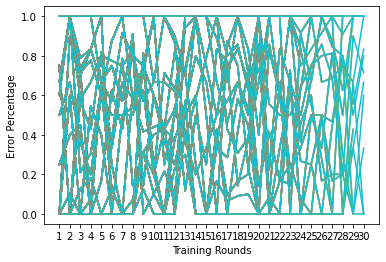

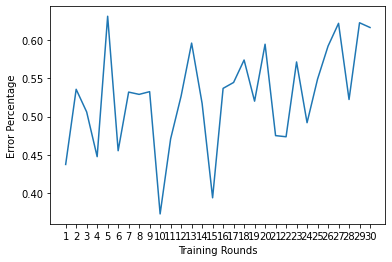

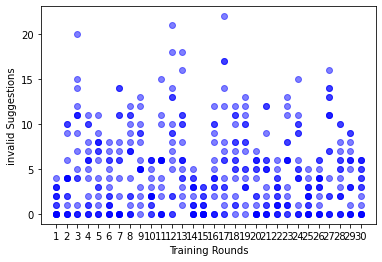

In [4]:

agent_30 = AgentCollection()        
agent_30.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_30.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_30.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_30.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_30.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_30.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_30.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_30.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_30.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_30.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_30.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_30.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_30.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_30.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_30.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_30.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_30.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_30.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_30) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_30.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_30.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_30.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_30, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_30.getAgentsByColor(True)

ROUNDS = 30
EPISODES_CNN = 30

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("Round ", str(i), " completed")

plot_errors_individually(white_agents)
plot_errors_grouped(white_agents)
plot_errors_scatter(white_agents)

--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f6a9cfa370 (Qxc3)>
Round  0  completed
True 5 [] total options: 7 options  <LegalMoveGenerator at 0x1f6a83dadf0 (Kf1, Be4, Be2, Ne4, Nce2, Nge2, Qe2)>
Round  1  completed
True 2 [] total options: 2 options  <LegalMoveGenerator at 0x1f6b34d6a00 (Qxd2, Bxd2)>
Round  2  completed
True 1 [] total options: 2 options  <LegalMoveGenerator at 0x1f6ac6f4070 (Kxf2, Kf1)>
Round  3  completed
True 1 [] total options: 3 options  <LegalMoveGenerator at 0x1f6b42fe550 (Kf4, Kf3, Kd2)>
Round  4  completed
True 3 [] total options: 3 options  <LegalMoveGenerator at 0x1f6b6288c10 (Kf1, Nc3, Qd2)>
Round  5  completed
True 13 [] total options: 26 options  <LegalMoveGenerator at 0x1f6b72c30a0 (Ng5, Nf4, Ng1, Kf3, Kd3, Kd2, Ke1, Rg1, Bg2, Qa4, Qd3, Qb3, Qd2, Qc2, 

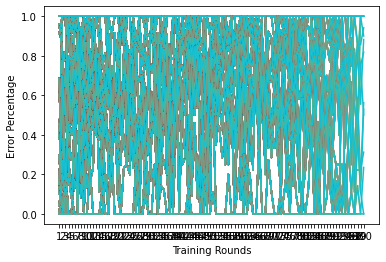

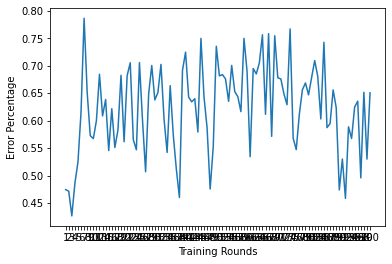

In [5]:

agent_100 = AgentCollection()        
agent_100.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_100.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_100.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_100.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_100.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_100.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_100.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_100.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_100.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_100.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_100.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_100.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_100.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_100.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_100.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_100.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_100.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_100.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_100) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_100.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_100.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_100.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_100, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_100.getAgentsByColor(True)

ROUNDS = 100
EPISODES_CNN = 100

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("Round ", str(i), " completed")

plot_errors_individually(white_agents)
plot_errors_grouped(white_agents)
plot_errors_scatter(white_agents)



--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 1 [] total options: 3 options  <LegalMoveGenerator at 0x1f6b434a6d0 (Kg4, Kh3, Kxg3)>
Round  0  completed
True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f6b593c760 (Nf2)>
Round  1  completed
True 2 [] total options: 2 options  <LegalMoveGenerator at 0x1f6b4304970 (Kf1, Nf2)>
Round  2  completed
True 2 [] total options: 3 options  <LegalMoveGenerator at 0x1f6b2c36910 (Kg5, Kg3, Nf4)>
Round  3  completed
True 4 [] total options: 10 options  <LegalMoveGenerator at 0x1f6b2d0b040 (Kf1, Qa4, Qxf3, Qb3, Qe2, Qc2, Ba3, Bb2, Nc3, Na3)>
Round  4  completed
True 2 [] total options: 3 options  <LegalMoveGenerator at 0x1f6b35f9250 (Kg2, Ke1, d4)>
Round  5  completed
True 11 [] total options: 32 options  <LegalMoveGenerator at 0x1f6b434ac70 (Ng5, Ng1, Rh1, Bxb7, Bc6+, Bd5, Be4, Bf3, Bh1, Bf1, Kf

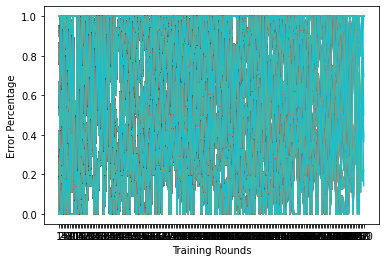

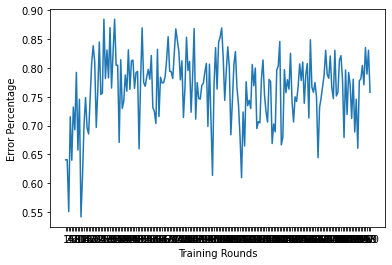

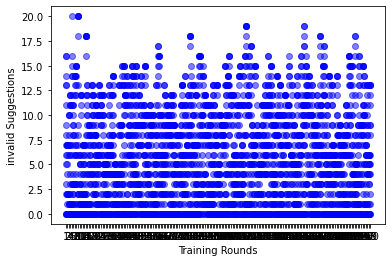

In [6]:

agent_var1 = AgentCollection()        
agent_var1.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_var1.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_var1.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_var1.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_var1.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_var1.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_var1.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_var1.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_var1.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_var1.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_var1.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_var1.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_var1.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_var1.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_var1.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_var1.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_var1.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_var1.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_var1) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_var1.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_var1.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_var1.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_var1, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_var1.getAgentsByColor(True)

ROUNDS = 200
EPISODES_CNN = 5

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("Round ", str(i), " completed")

plot_errors_individually(white_agents)
plot_errors_grouped(white_agents)
plot_errors_scatter(white_agents)





--> Starting to read dataset <-- 
--> Read and learned from APF 592 games <-- 
--> Setting up ChessEnvironment <-- 
Example A1 dataset:  1038
--> Finished setting up ChessEnvironment <-- 
True 1 [] total options: 2 options  <LegalMoveGenerator at 0x1f6c5c32130 (Kf3, Ke1)>
Round  0  completed
True 10 [] total options: 33 options  <LegalMoveGenerator at 0x1f6bab374c0 (Rh5, Rh4, Rh3, Rh2, Nh3, Nf3, Ne2, Ba6, Bb5+, Bc4, Bd3, Be2, Ke2, Qxd5, Qxg4, Qd4, Qf3, Qd3, Qe2, Qd2, Ba3, Bd2, Bb2, Rxb6, Rb5, Rb4, Rb3, Rb2, Ra1, e4, g3, a3, a4)>
Round  1  completed
True 1 [] total options: 1 options  <LegalMoveGenerator at 0x1f6c69f8c10 (g3)>
Round  2  completed
True 0 [] total options: 0 options  <LegalMoveGenerator at 0x1f6c27d5370 ()>
Round  3  completed
True 2 [] total options: 2 options  <LegalMoveGenerator at 0x1f6c33de370 (Ke2, g3)>
Round  4  completed


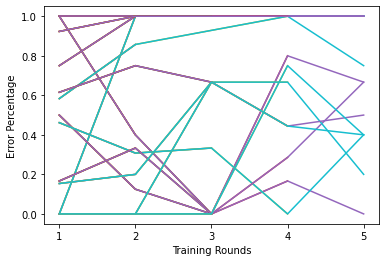

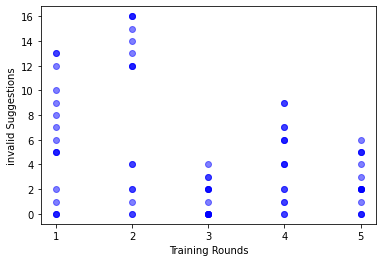

In [7]:

agent_var2 = AgentCollection()        
agent_var2.addAgent(Agent(chess.WHITE, chess.ROOK, chess.A1)) #Rook R
agent_var2.addAgent(Agent(chess.WHITE, chess.ROOK, chess.H1)) #Rook L
agent_var2.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.B1))  #Knight R
agent_var2.addAgent(Agent(chess.WHITE, chess.KNIGHT, chess.G1)) #Knight L 
agent_var2.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.C1))  #Bishop L
agent_var2.addAgent(Agent(chess.WHITE, chess.BISHOP, chess.F1)) #Bishop R
agent_var2.addAgent(Agent(chess.WHITE, chess.KING, chess.E1)) #King  
agent_var2.addAgent(Agent(chess.WHITE, chess.QUEEN, chess.D1)) #Queen
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.A2))  #Pawn 1
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.B2))  #Pawn 2
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.C2))  #Pawn 3
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.D2))  #Pawn 4
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.E2))  #Pawn 5
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.F2))  #Pawn 6 
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.G2))  #Pawn 7
agent_var2.addAgent(Agent(chess.WHITE, chess.PAWN, chess.H2)) #Pawn 8       

agent_var2.addAgent(Agent(chess.BLACK, chess.ROOK, chess.A8))  #Rook R
agent_var2.addAgent(Agent(chess.BLACK, chess.ROOK, chess.H8))  #Rook L
agent_var2.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.B8)) #Knight R
agent_var2.addAgent(Agent(chess.BLACK, chess.KNIGHT, chess.G8)) #Knight L 
agent_var2.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.C8)) #Bishop L
agent_var2.addAgent(Agent(chess.BLACK, chess.BISHOP, chess.F8)) #Bishop R
agent_var2.addAgent(Agent(chess.BLACK, chess.KING, chess.E8)) #King  
agent_var2.addAgent(Agent(chess.BLACK, chess.QUEEN, chess.D8)) #Queen
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.A7)) #Pawn 1
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.B7)) #Pawn 2
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.C7)) #Pawn 3
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.D7)) #Pawn 4
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.E7)) #Pawn 5
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.F7)) #Pawn 6 
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.G7)) #Pawn 7
agent_var2.addAgent(Agent(chess.BLACK, chess.PAWN, chess.H7)) #Pawn 8
    

sampleConv = SampleConverter(agent_var2) 
print("--> Starting to read dataset <-- ")
sampleConv.read_dataset(PATH + FILE )    
print("--> Read and learned from APF " + str(sampleConv.total_games) + " games <-- ")


experiment = Experiment( episodes=EPISODES_COOP,hidden_size=HIDDEN_SIZE, max_steps=MAX_STEPS)
print("--> Setting up ChessEnvironment <-- ")

for agent in agent_var2.allAgents: 
    random.shuffle(agent.dataset)
    i = int(len(agent.dataset)/3)
    agent.trainAPF = agent.dataset[:i]
    agent.trainNet = agent.dataset[i:2*i]
    agent.test = agent.dataset[2*i:3*i]
    agent.dataset = [] #free space 
print("Example A1 dataset: ", len(agent_var2.getAgentAtStartingPosition(chess.A1).trainAPF)*3)
        
#plot_frequency_distribution([agent_var2.getAgentAtStartingPosition(chess.B1)])

env = ChessEnvironment(agent_var2, min_appear=1, experiment_conf=experiment)
print("--> Finished setting up ChessEnvironment <-- ")
stockfish=Stockfish("stockfish-windows-x86-64-modern")
stockfish.set_depth(10)
stockfish.set_skill_level(5)
white_agents = agent_var2.getAgentsByColor(True)

ROUNDS = 5
EPISODES_CNN = 200

for agent in white_agents: 
    agent.reset_training(ROUNDS)
    
for i in range(ROUNDS):
    for agent in white_agents: 
        #print(agent.starting_position)
        train_net(agent, EPISODES_CNN)
    env.play_against_bot(i, stockfish)
    print("Round ", str(i), " completed")

plot_errors_individually(white_agents)
plot_errors_grouped(white_agents)
plot_errors_scatter(white_agents)





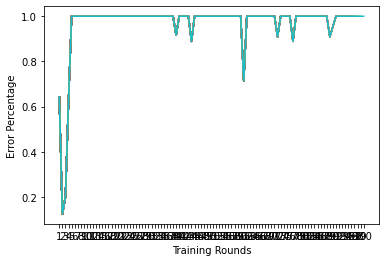

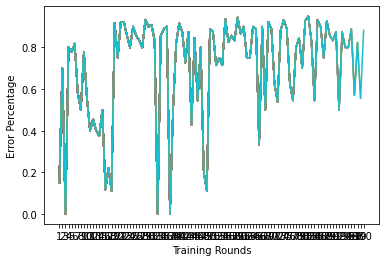

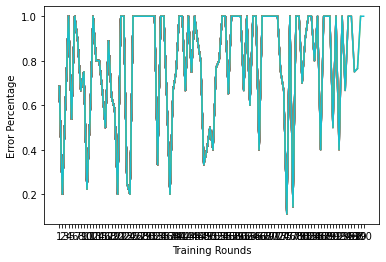

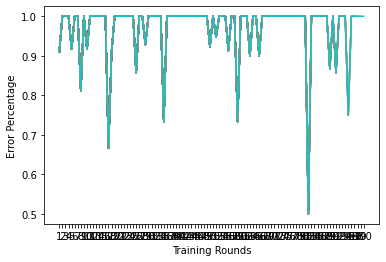

In [12]:
agent = [agent_100.getAgentAtStartingPosition(chess.A1)]#, agent_100.getAgentAtStartingPosition(chess.E2),agent_100.getAgentAtStartingPosition(chess.E1)]
plot_errors_individually( [agent_100.getAgentAtStartingPosition(chess.A1)])
plot_errors_individually( [agent_100.getAgentAtStartingPosition(chess.E2)])
plot_errors_individually( [agent_100.getAgentAtStartingPosition(chess.E1)])
plot_errors_individually( [agent_100.getAgentAtStartingPosition(chess.D1)])

In [199]:
    
def new_plot_errors_individually(agents: list[Agent], legend, rounds,intervall=10): 
    
    plot_x = []
    plot_y = []
    #colors = ["green", "red", "blue"]
    for agent in agents:    
        x = []
        y = []
        for i in range(len(agent.validSuggestions)): 
            x += [i+1]
            if agent.invalidSuggestions[i] > 0 or agent.validSuggestions[i] > 0:
                y += [agent.invalidSuggestions[i] / (agent.invalidSuggestions[i] + agent.validSuggestions[i])]
            else: 
                y += [None] #we dont take value, because the agent didnt take a decision in this game 
        #print(x)
        #print(y)
        x_filtered = [x_val for x_val, y_val in zip(x, y) if y_val is not None]
        y_filtered = [y_val for y_val in y if y_val is not None]    
        plot_x += [x_filtered]
        plot_y += [y_filtered]
    
    for x,y in zip(plot_x, plot_y):
        print(sum(y)/len(x))
        print(len(x))
        plt.plot(x,y)       
        
    # Customize the plot (labels, title, legend, etc. as needed)
    plt.xlabel('Training Rounds')
    plt.ylabel('Error Percentage')
    plt.legend(legend)  # Add legend labels for each agent
    plt.xticks(range(0,rounds+1,intervall))
    plt.yticks([0,0.2,0.4,0.6,0.8,1])
    # Show the plot or save it to a file
    plt.show()

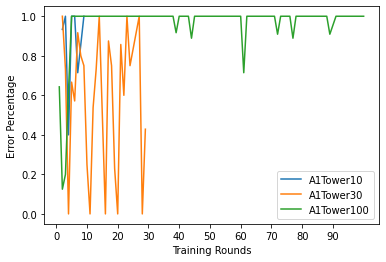

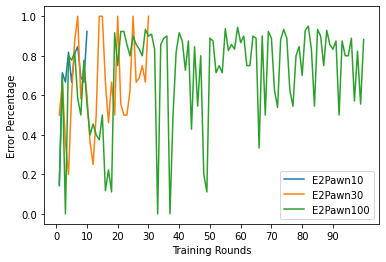

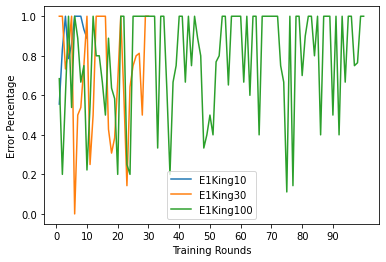

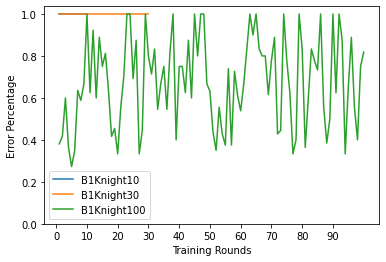

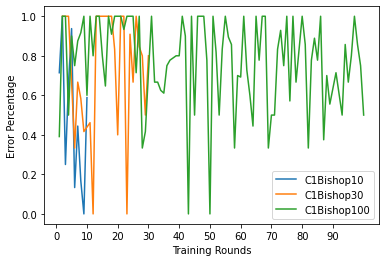

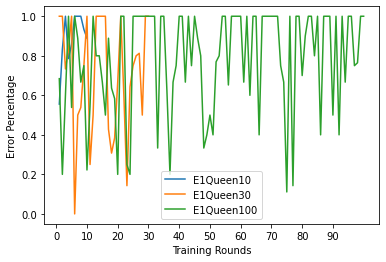

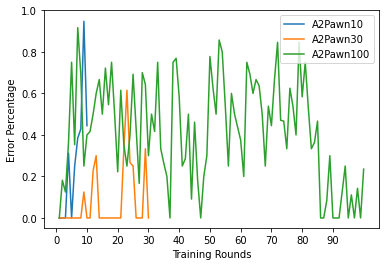

In [78]:
#agent = [agent_100.getAgentAtStartingPosition(chess.A1)]#, agent_100.getAgentAtStartingPosition(chess.E2),agent_100.getAgentAtStartingPosition(chess.E1)]
agents =  [agent_10.getAgentAtStartingPosition(chess.A1), agent_30.getAgentAtStartingPosition(chess.A1),
           agent_100.getAgentAtStartingPosition(chess.A1)]

new_plot_errors_individually(agents, ["A1Tower10", "A1Tower30", "A1Tower100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.E2), agent_30.getAgentAtStartingPosition(chess.E2),
           agent_100.getAgentAtStartingPosition(chess.E2)]

new_plot_errors_individually(agents,  ["E2Pawn10", "E2Pawn30", "E2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.E1), agent_30.getAgentAtStartingPosition(chess.E1),
           agent_100.getAgentAtStartingPosition(chess.E1)]

new_plot_errors_individually(agents,   ["E1King10", "E1King30", "E1King100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.B1), agent_30.getAgentAtStartingPosition(chess.B1),
           agent_100.getAgentAtStartingPosition(chess.B1)]

new_plot_errors_individually(agents, ["B1Knight10", "B1Knight30", "B1Knight100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.C1), agent_30.getAgentAtStartingPosition(chess.C1),
           agent_100.getAgentAtStartingPosition(chess.C1)]

new_plot_errors_individually(agents, ["C1Bishop10", "C1Bishop30", "C1Bishop100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.E2), agent_30.getAgentAtStartingPosition(chess.E2),
           agent_100.getAgentAtStartingPosition(chess.E2)]

new_plot_errors_individually(agents, ["E2Queen10", "E2Queen30", "E2Queen100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.A2), agent_30.getAgentAtStartingPosition(chess.A2),
           agent_100.getAgentAtStartingPosition(chess.A2)]

new_plot_errors_individually(agents, ["A2Pawn10", "A2Pawn30", "A2Pawn100"])


0.8639455782312926
7
0.6949363136863138
10
0.8558241758241758
10


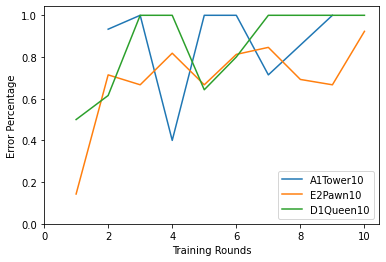

In [200]:
agents =  [agent_10.getAgentAtStartingPosition(chess.A1), agent_10.getAgentAtStartingPosition(chess.E2),
           agent_10.getAgentAtStartingPosition(chess.D1)]

new_plot_errors_individually(agents, ["A1Tower10", "E2Pawn10", "D1Queen10"], 10,2)

In [201]:
agents =  [agent_30.getAgentAtStartingPosition(chess.A1), agent_30.getAgentAtStartingPosition(chess.E2),
           agent_30.getAgentAtStartingPosition(chess.D1)]

new_plot_errors_individually(agents, ["A1Tower30", "E2Pawn30", "D1Queen30"], 30)

0.578054945054945
25
0.6499511137011137
30
0.9428357509936458
30


In [202]:
agents =  [agent_100.getAgentAtStartingPosition(chess.A1), agent_100.getAgentAtStartingPosition(chess.E2),
           agent_100.getAgentAtStartingPosition(chess.D1)]

new_plot_errors_individually(agents, ["A1Tower100", "E2Pawn100", "D1Queen100"], 100)

0.9616839652984231
83
0.7102675646675006
100
0.9690945567349768
99


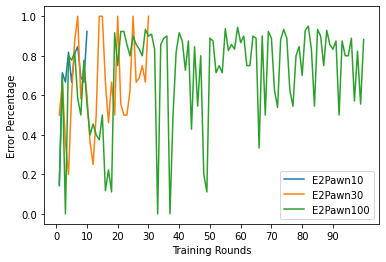

In [161]:
agents =  [agent_10.getAgentAtStartingPosition(chess.E2), agent_30.getAgentAtStartingPosition(chess.E2),
           agent_100.getAgentAtStartingPosition(chess.E2)]

new_plot_errors_individually(agents, ["E2Pawn10", "E2Pawn30", "E2Pawn100"])

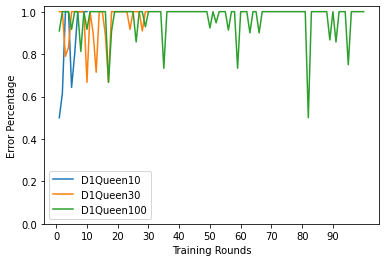

In [113]:
agents =  [agent_10.getAgentAtStartingPosition(chess.D1), agent_30.getAgentAtStartingPosition(chess.D1),
           agent_100.getAgentAtStartingPosition(chess.D1)]

new_plot_errors_individually(agents, ["D1Queen10", "D1Queen30", "D1Queen100"])

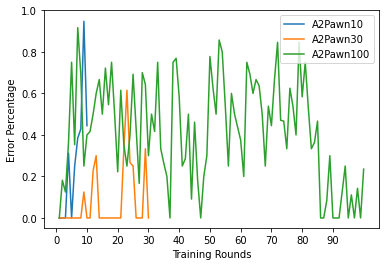

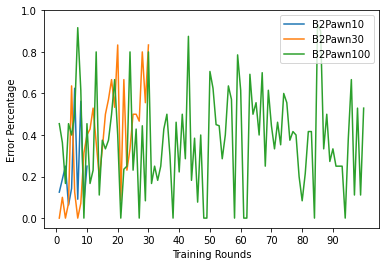

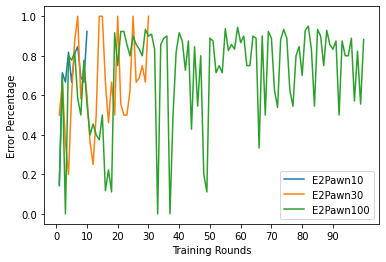

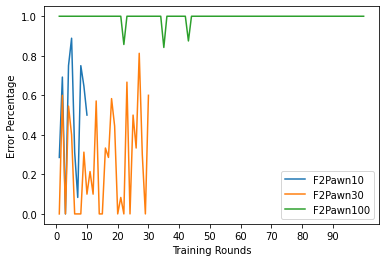

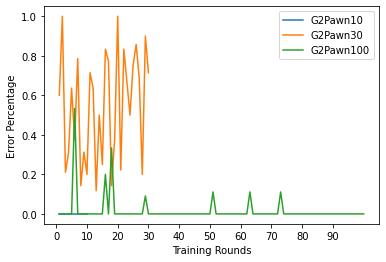

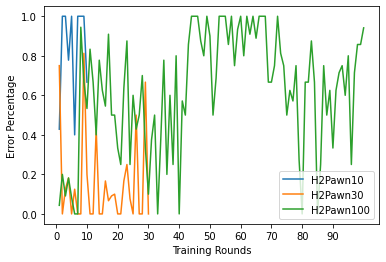

In [172]:
agents =  [agent_10.getAgentAtStartingPosition(chess.A2), agent_30.getAgentAtStartingPosition(chess.A2),
           agent_100.getAgentAtStartingPosition(chess.A2)]

new_plot_errors_individually(agents, ["A2Pawn10", "A2Pawn30", "A2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.B2), agent_30.getAgentAtStartingPosition(chess.B2),
           agent_100.getAgentAtStartingPosition(chess.B2)]

new_plot_errors_individually(agents, ["B2Pawn10", "B2Pawn30", "B2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.C2), agent_30.getAgentAtStartingPosition(chess.C2),
           agent_100.getAgentAtStartingPosition(chess.C2)]

new_plot_errors_individually(agents, ["C2Pawn10", "C2Pawn30", "C2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.D2), agent_30.getAgentAtStartingPosition(chess.D2),
           agent_100.getAgentAtStartingPosition(chess.D2)]

new_plot_errors_individually(agents, ["D2Pawn10", "D2Pawn30", "D2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.E2), agent_30.getAgentAtStartingPosition(chess.E2),
           agent_100.getAgentAtStartingPosition(chess.E2)]

new_plot_errors_individually(agents, ["E2Pawn10", "E2Pawn30", "E2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.F2), agent_30.getAgentAtStartingPosition(chess.F2),
           agent_100.getAgentAtStartingPosition(chess.F2)]

new_plot_errors_individually(agents, ["F2Pawn10", "F2Pawn30", "F2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.G2), agent_30.getAgentAtStartingPosition(chess.G2),
           agent_100.getAgentAtStartingPosition(chess.G2)]

new_plot_errors_individually(agents, ["G2Pawn10", "G2Pawn30", "G2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.H2), agent_30.getAgentAtStartingPosition(chess.H2),
           agent_100.getAgentAtStartingPosition(chess.H2)]

new_plot_errors_individually(agents, ["H2Pawn10", "H2Pawn30", "H2Pawn100"])

In [99]:
def plot_errors_grouped(agents: list[Agent],legend, rounds, interval=1): 
    x = []
    y = []
    for i in range(len(agents[0].validSuggestions)): 
        summed_valid = 0 
        summed_invalid = 0 
        for agent in agents:
            if agent.invalidSuggestions[i] > 0 or agent.validSuggestions[i] > 0:
                summed_valid += agent.validSuggestions[i]
                summed_invalid += agent.invalidSuggestions[i]
        if summed_valid > 0: 
            x += [i+1]
            y += [summed_invalid/(summed_valid+summed_invalid)]

    fig, ax = plt.subplots() 
    plt.plot(x,y)
    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=2, label='0.5 ErrorRate')
    plt.plot
    # Customize the plot (labels, title, legend, etc. as needed)
    plt.xlabel('Training Rounds')
    plt.ylabel('Error Percentage')
    plt.legend(legend)  # Add legend labels for each agent
    plt.xticks(range(1,rounds+1,interval))
    plt.yticks([0,0.2,0.4,0.6,0.8,1])
    # Show the plot or save it to a file
    plt.show()
    


In [100]:
plot_errors_grouped(agent_10.getAgentsByColor(True), ["allGrouped10"],10)
plot_errors_grouped(agent_30.getAgentsByColor(True), ["allGrouped30"],30)
plot_errors_grouped(agent_100.getAgentsByColor(True), ["allGrouped100"], 100)

In [148]:

import numpy as np
import tensorflow as tf
from plotting import is_action_valid

def absolute_to_relative_movement(start,dest): 
    ''' integer to relative '''
    start = chess.square_name(start)
    dest = chess.square_name(dest)
    
    x = ord(dest[0]) - ord(start[0])
    y = ord(dest[1]) - ord(start[1])
    
    return (x,y)

def new_plot_APF(agents:list, ax):
#(dataset, colors:list, piece, starting_positions:list): 
    '''
    colors = [WHITE] oder [WHITE,BLACK]
    '''

    fig = plt.figure()
    fig.set_size_inches(8,8)

    x = []
    y = []
    
    for agent in agents: 
        for [_,(start,dest),_] in agent.trainAPF: 
            (start,dest) = absolute_to_relative_movement(start,dest)
            x += [start]
            y += [dest]
           
    
    hist, xedges, yedges = np.histogram2d(x, y, bins=15, range=[[-7, 7], [-7, 7]])
    # Construct arrays for the anchor positions 
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.7 * np.ones_like(zpos) #Breite der Säulen 
    dz = hist.ravel()
    print(sum(sum(hist)))
    #ax.elev = 45 #height camera  
    #ax.azim = 90 #rotation y axis
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

    #print(sum(sum(hist)))
    #ax.set_title(chess.piece_name(PIECE))
    ax.set_xlabel("Relative movement x-axis")
    ax.set_ylabel("Relative movement y-axis")
    ax.set_zlabel("Frequence")
    #plt.show()

def new_plot_histograms(agent:Agent, ax):   
    #####PLOT NEW 
    (X_test, _, states, actions) = transform_dataset(agent,agent.test)
    predictions = agent.cnn.predict(X_test)
    predictions = tf.argmax(predictions, axis=-1)
    
    validPrediction = 0
    invalidPrediction = 0
    for i in range(len(X_test)):
        is_valid = is_action_valid(agent, actions[i], states[i], predictions[i])
        if is_valid:
            validPrediction += 1 
        else:
            invalidPrediction += 1
    totalSuggestions = validPrediction + invalidPrediction
    print(str(agent.starting_position), " made ", str(validPrediction), " correct out of ", totalSuggestions, "total suggestions")
    
    x_move = []
    y_move = []

    
    for pred in predictions.numpy(): 
        x_move += [agent.action_space[pred][0]]
        y_move += [agent.action_space[pred][1]]
    hist, xedges, yedges = np.histogram2d(x_move, y_move, bins=15, range=[[-7, 7], [-7, 7]])
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.7 * np.ones_like(zpos) #Breite der Säulen 
    dz = hist.ravel() #ax.elev = 45 #height camera  
    #ax.azim = 90 #rotation y axis
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

    #print(sum(sum(hist)))
    #ax.set_title(chess.piece_name(PIECE))
    ax.set_xlabel("Relative movement x-axis")
    ax.set_ylabel("Relative movement y-axis")
    ax.set_zlabel("Frequence")
    
    #plt.show()

132.0
8  made  26  correct out of  132 total suggestions
8  made  86  correct out of  132 total suggestions
8  made  109  correct out of  132 total suggestions


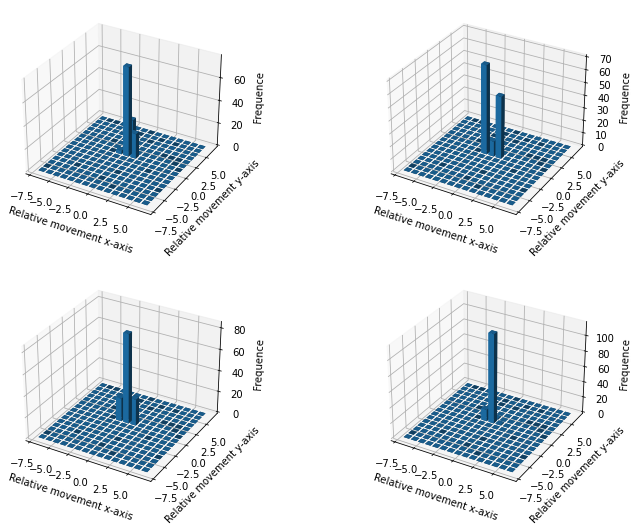

<Figure size 576x576 with 0 Axes>

In [154]:
piece = chess.A2

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
new_plot_APF([agent_10.getAgentAtStartingPosition(piece)],ax1)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
new_plot_histograms(agent_10.getAgentAtStartingPosition(piece),ax2)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
new_plot_histograms(agent_30.getAgentAtStartingPosition(piece),ax3)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
new_plot_histograms(agent_100.getAgentAtStartingPosition(piece),ax4)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

346.0
0  made  94  correct out of  346 total suggestions
0  made  136  correct out of  346 total suggestions
0  made  70  correct out of  346 total suggestions


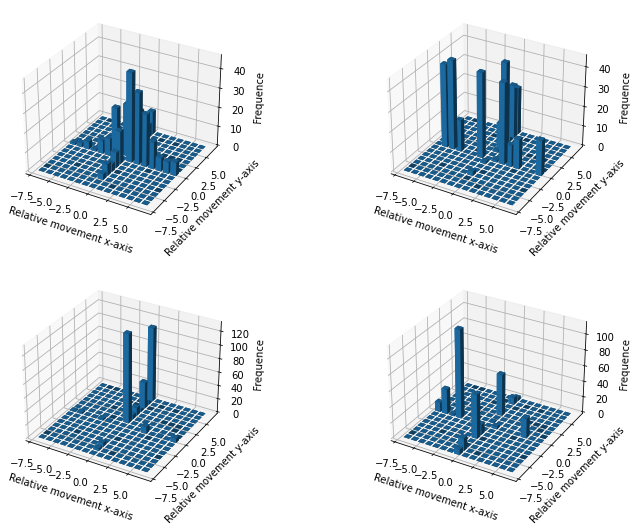

<Figure size 576x576 with 0 Axes>

In [155]:
piece = chess.A1

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
new_plot_APF([agent_10.getAgentAtStartingPosition(piece)],ax1)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
new_plot_histograms(agent_10.getAgentAtStartingPosition(piece),ax2)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
new_plot_histograms(agent_30.getAgentAtStartingPosition(piece),ax3)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
new_plot_histograms(agent_100.getAgentAtStartingPosition(piece),ax4)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

In [156]:
piece = chess.B1

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
new_plot_APF([agent_10.getAgentAtStartingPosition(piece)],ax1)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
new_plot_histograms(agent_10.getAgentAtStartingPosition(piece),ax2)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
new_plot_histograms(agent_30.getAgentAtStartingPosition(piece),ax3)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
new_plot_histograms(agent_100.getAgentAtStartingPosition(piece),ax4)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

387.0
1  made  116  correct out of  387 total suggestions
1  made  159  correct out of  387 total suggestions
1  made  196  correct out of  387 total suggestions


<Figure size 576x576 with 0 Axes>

377.0
2  made  179  correct out of  376 total suggestions
2  made  92  correct out of  377 total suggestions
2  made  117  correct out of  377 total suggestions


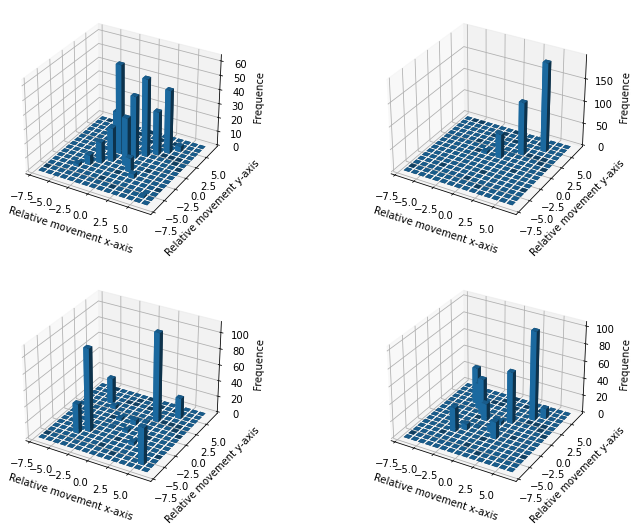

<Figure size 576x576 with 0 Axes>

In [157]:
piece = chess.C1

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
new_plot_APF([agent_10.getAgentAtStartingPosition(piece)],ax1)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
new_plot_histograms(agent_10.getAgentAtStartingPosition(piece),ax2)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
new_plot_histograms(agent_30.getAgentAtStartingPosition(piece),ax3)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
new_plot_histograms(agent_100.getAgentAtStartingPosition(piece),ax4)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

405.0
3  made  102  correct out of  405 total suggestions
3  made  161  correct out of  405 total suggestions
3  made  103  correct out of  404 total suggestions


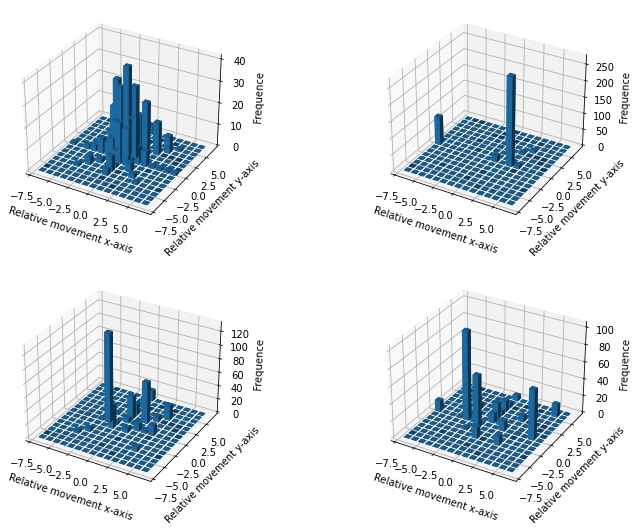

<Figure size 576x576 with 0 Axes>

In [158]:
piece = chess.D1

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
new_plot_APF([agent_10.getAgentAtStartingPosition(piece)],ax1)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
new_plot_histograms(agent_10.getAgentAtStartingPosition(piece),ax2)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
new_plot_histograms(agent_30.getAgentAtStartingPosition(piece),ax3)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
new_plot_histograms(agent_100.getAgentAtStartingPosition(piece),ax4)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

486.0
4  made  254  correct out of  486 total suggestions
4  made  212  correct out of  486 total suggestions
4  made  221  correct out of  486 total suggestions


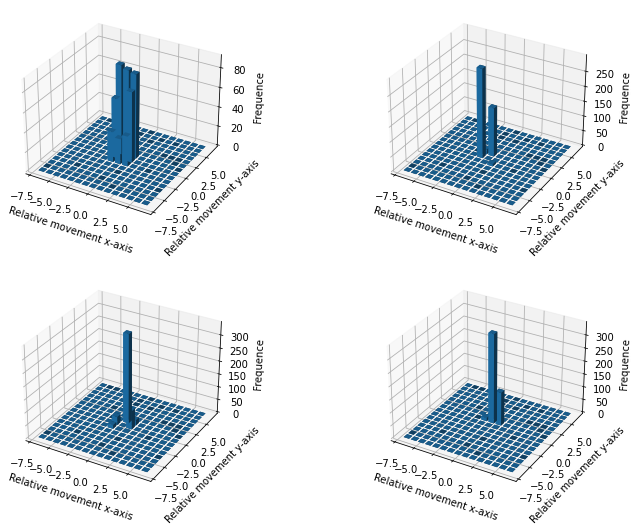

<Figure size 576x576 with 0 Axes>

In [159]:
piece = chess.E1

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
new_plot_APF([agent_10.getAgentAtStartingPosition(piece)],ax1)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
new_plot_histograms(agent_10.getAgentAtStartingPosition(piece),ax2)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
new_plot_histograms(agent_30.getAgentAtStartingPosition(piece),ax3)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
new_plot_histograms(agent_100.getAgentAtStartingPosition(piece),ax4)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

274.0
12  made  63  correct out of  274 total suggestions
12  made  103  correct out of  274 total suggestions
12  made  138  correct out of  274 total suggestions


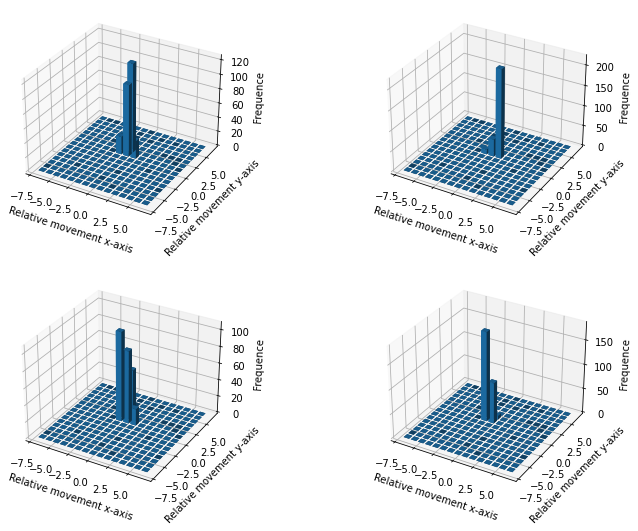

<Figure size 576x576 with 0 Axes>

In [160]:
piece = chess.E2 

fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
new_plot_APF([agent_10.getAgentAtStartingPosition(piece)],ax1)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
new_plot_histograms(agent_10.getAgentAtStartingPosition(piece),ax2)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
new_plot_histograms(agent_30.getAgentAtStartingPosition(piece),ax3)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
new_plot_histograms(agent_100.getAgentAtStartingPosition(piece),ax4)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

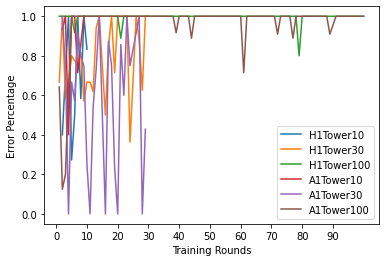

In [165]:
agents =  [agent_10.getAgentAtStartingPosition(chess.H1), agent_30.getAgentAtStartingPosition(chess.H1),
           agent_100.getAgentAtStartingPosition(chess.H1), agent_10.getAgentAtStartingPosition(chess.A1), agent_30.getAgentAtStartingPosition(chess.A1),
           agent_100.getAgentAtStartingPosition(chess.A1)]

new_plot_errors_individually(agents, ["H1Tower10", "H1Tower30", "H1Tower100", "A1Tower10", "A1Tower30", "A1Tower100"])

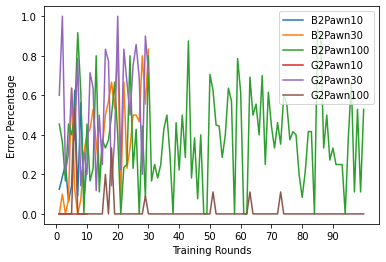

In [167]:
agents =  [agent_10.getAgentAtStartingPosition(chess.B2), agent_30.getAgentAtStartingPosition(chess.B2),
           agent_100.getAgentAtStartingPosition(chess.B2), agent_10.getAgentAtStartingPosition(chess.G2), agent_30.getAgentAtStartingPosition(chess.G2),
           agent_100.getAgentAtStartingPosition(chess.G2)]

new_plot_errors_individually(agents, ["B2Pawn10", "B2Pawn30", "B2Pawn100", "G2Pawn10", "G2Pawn30", "G2Pawn100"])

agents =  [agent_10.getAgentAtStartingPosition(chess.A2), agent_30.getAgentAtStartingPosition(chess.A2),
           agent_100.getAgentAtStartingPosition(chess.A2), agent_10.getAgentAtStartingPosition(chess.H2), agent_30.getAgentAtStartingPosition(chess.H2),
           agent_100.getAgentAtStartingPosition(chess.H2)]

new_plot_errors_individually(agents, ["A2Pawn10", "A2Pawn30", "A2Pawn100", "H2Pawn10", "H2Pawn30", "H2Pawn100"])

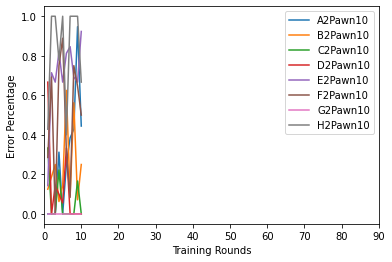

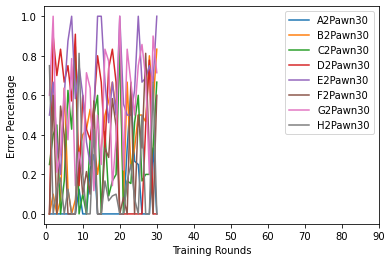

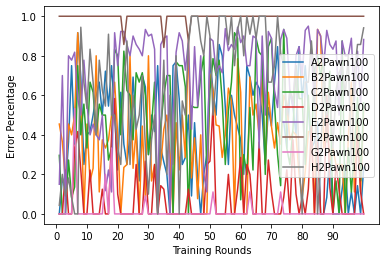

In [170]:
agents =  [agent_10.getAgentAtStartingPosition(chess.A2),agent_10.getAgentAtStartingPosition(chess.B2),agent_10.getAgentAtStartingPosition(chess.C2), agent_10.getAgentAtStartingPosition(chess.D2),
           agent_10.getAgentAtStartingPosition(chess.E2), agent_10.getAgentAtStartingPosition(chess.F2), agent_10.getAgentAtStartingPosition(chess.G2), agent_10.getAgentAtStartingPosition(chess.H2)]

new_plot_errors_individually(agents, ["A2Pawn10","B2Pawn10","C2Pawn10","D2Pawn10","E2Pawn10", "F2Pawn10", "G2Pawn10", "H2Pawn10"])

agents =  [agent_30.getAgentAtStartingPosition(chess.A2),agent_30.getAgentAtStartingPosition(chess.B2),agent_30.getAgentAtStartingPosition(chess.C2), agent_30.getAgentAtStartingPosition(chess.D2),
           agent_30.getAgentAtStartingPosition(chess.E2), agent_30.getAgentAtStartingPosition(chess.F2), agent_30.getAgentAtStartingPosition(chess.G2), agent_30.getAgentAtStartingPosition(chess.H2)]

new_plot_errors_individually(agents, ["A2Pawn30","B2Pawn30","C2Pawn30","D2Pawn30","E2Pawn30", "F2Pawn30", "G2Pawn30", "H2Pawn30"])

agents =  [agent_100.getAgentAtStartingPosition(chess.A2),agent_100.getAgentAtStartingPosition(chess.B2),agent_100.getAgentAtStartingPosition(chess.C2), agent_100.getAgentAtStartingPosition(chess.D2),
           agent_100.getAgentAtStartingPosition(chess.E2), agent_100.getAgentAtStartingPosition(chess.F2), agent_100.getAgentAtStartingPosition(chess.G2), agent_100.getAgentAtStartingPosition(chess.H2)]

new_plot_errors_individually(agents, ["A2Pawn100","B2Pawn100","C2Pawn100","D2Pawn100","E2Pawn100", "F2Pawn100", "G2Pawn100", "H2Pawn100"])


['8/p1k5/1pP2r1p/1Pn1pBp1/P5P1/4KP2/8/3R4 w - - 6 40', (3, 35), '8/p1k5/1pP2r1p/1PnRpBp1/P5P1/4KP2/8/8 b - - 7 40']
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 26.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  3.  6.  4.  8. 17.  0. 27. 23. 19. 18.  8.  7. 12.]
 [ 0.  0.  0.  0.  0.  0.  0. 46.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 37.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 27.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 14.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.]
 [

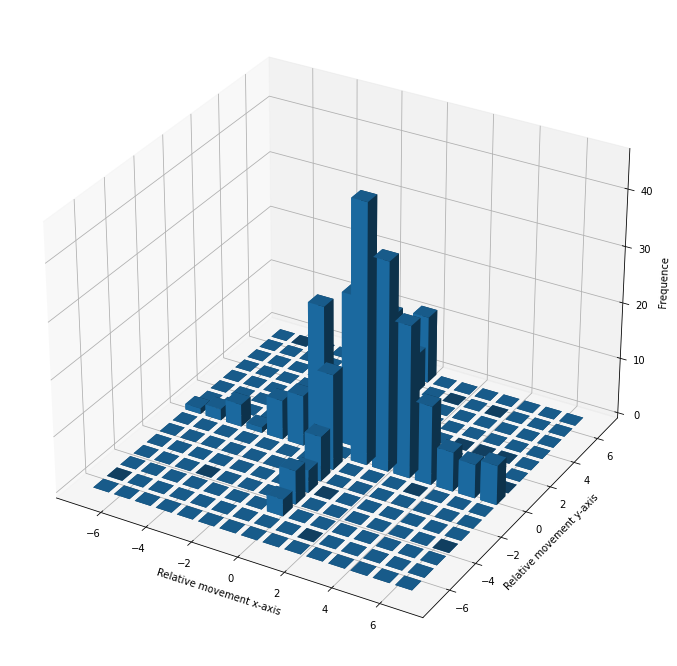

['2r1k2r/pp3pp1/2n1p1p1/3p4/3P2P1/2P4P/PP1K1PB1/R6R w k - 1 20', (7, 4), '2r1k2r/pp3pp1/2n1p1p1/3p4/3P2P1/2P4P/PP1K1PB1/R3R3 b k - 2 20']
[[ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 22.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 22.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 58.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  3.  3.  5.  9. 20.  0. 28. 42. 17. 14. 15. 12.  8.]
 [ 0.  0.  0.  0.  0.  0.  0. 26.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 17.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  

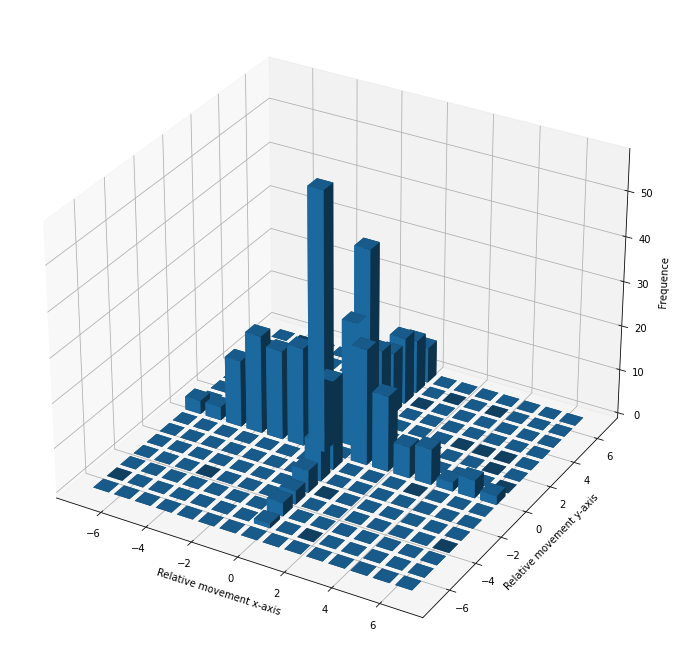

In [205]:
plot_APF([agent_10.getAgentAtStartingPosition(chess.A1)])
plot_APF([agent_10.getAgentAtStartingPosition(chess.H1)])